In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from conjugate import conj_grad
from steepest import steepest_descent

In [4]:
A = np.array([[4,1],[1,3]])
b = np.array([1,2])
x_0 = np.array([2,1])

In [5]:
stee_x, stee_val, stee_its, stee_xs, stee_residuals = steepest_descent(A, b, x_0)
conj_x, conj_val, conj_its, conj_xs, conj_residuals = conj_grad(A, b, x_0)
stee_xs = np.array(stee_xs)
conj_xs = np.array(conj_xs)
stee_residual_norms = np.linalg.norm(stee_residuals, axis=1)
conj_residual_norms = np.linalg.norm(conj_residuals, axis=1)
stee_errors = stee_xs - stee_x
conj_errors = conj_xs - conj_x
stee_error_norms = np.linalg.norm(stee_errors, axis=1)
conj_error_norms = np.linalg.norm(conj_errors, axis=1)

In [6]:
print(conj_residuals)

[array([-8, -3]), array([-0.28096677,  0.74924471]), array([ 2.22044605e-16, -0.00000000e+00])]


In [7]:
print(stee_its, conj_its)
print(len(stee_residuals), len(conj_residuals))
print(len(stee_xs), len(conj_xs))

15 2
16 3
16 3


In [8]:
print(stee_x, conj_x)

[0.09090909 0.63636364] [0.09090909 0.63636364]


In [9]:
print(stee_val, conj_val)

-0.681818181818182 -0.6818181818181818


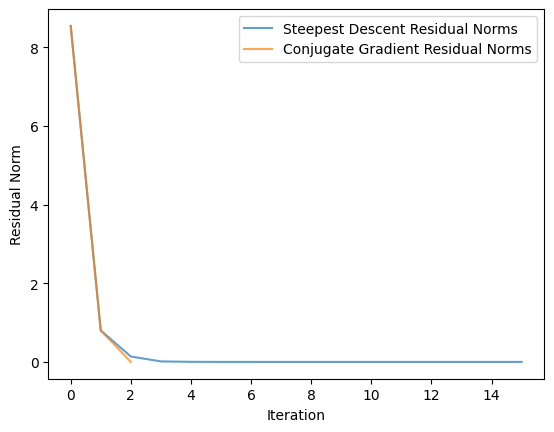

In [10]:
plt.plot(stee_residual_norms, alpha=0.7, label='Steepest Descent Residual Norms')
plt.plot(conj_residual_norms, alpha=0.7, label='Conjugate Gradient Residual Norms')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.legend()

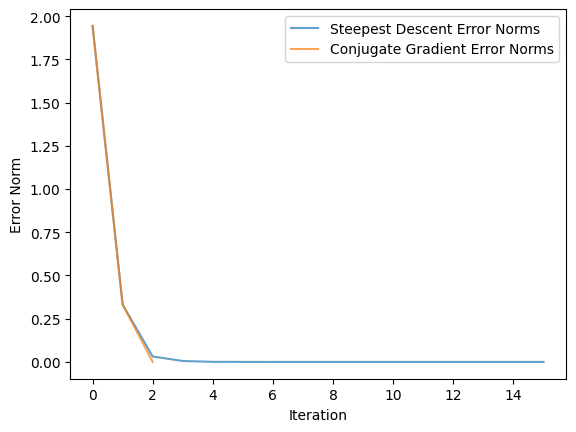

In [11]:
plt.plot(stee_error_norms, alpha=0.7, label='Steepest Descent Error Norms')
plt.plot(conj_error_norms, alpha=0.7, label='Conjugate Gradient Error Norms')
plt.xlabel('Iteration')
plt.ylabel('Error Norm')
plt.legend()

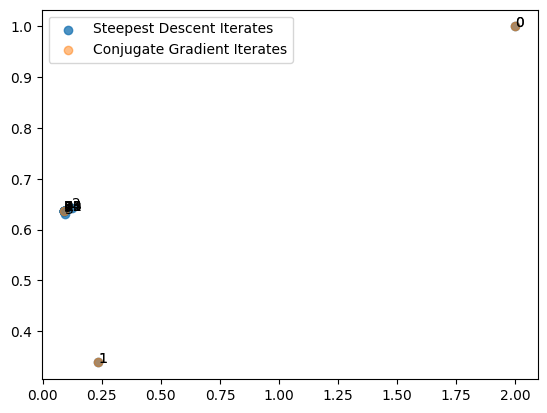

In [12]:
plt.scatter(stee_xs[:,0], stee_xs[:,1], alpha=0.8, label='Steepest Descent Iterates')
plt.scatter(conj_xs[:,0], conj_xs[:,1], alpha=0.5, label='Conjugate Gradient Iterates')
for i in range(len(stee_xs)):
    plt.annotate(i, (stee_xs[i,0], stee_xs[i,1]))

for i in range(len(conj_xs)):
    plt.annotate(i, (conj_xs[i,0], conj_xs[i,1]))

plt.legend()

In [13]:
def generate_symmetric_positive_definite_matrix(n):
    A = np.random.rand(n,n)
    A = np.dot(A.T, A)
    return A

In [20]:
stee_conv_steps = []
conj_conv_steps = []
conj_error_size = []
stee_error_size = []

for i in range(2,51):
    A = generate_symmetric_positive_definite_matrix(i)
    b = np.random.rand(i)
    x_0 = np.random.rand(i)
    
    actual_x = np.linalg.solve(A,b)
    
    stee_x, stee_val, stee_its, stee_xs, stee_residuals = steepest_descent(A, b, x_0)
    conj_x, conj_val, conj_its, conj_xs, conj_residuals = conj_grad(A, b, x_0)
    
    stee_conv_steps.append(stee_its)
    conj_conv_steps.append(conj_its)
    conj_error_size.append(np.linalg.norm(conj_x - actual_x))   
    stee_error_size.append(np.linalg.norm(stee_x - actual_x)) 

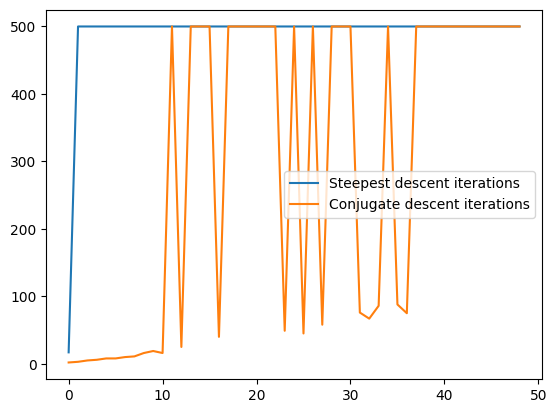

In [21]:
plt.plot(stee_conv_steps, label="Steepest descent iterations")
plt.plot(conj_conv_steps, label="Conjugate descent iterations")

plt.legend()

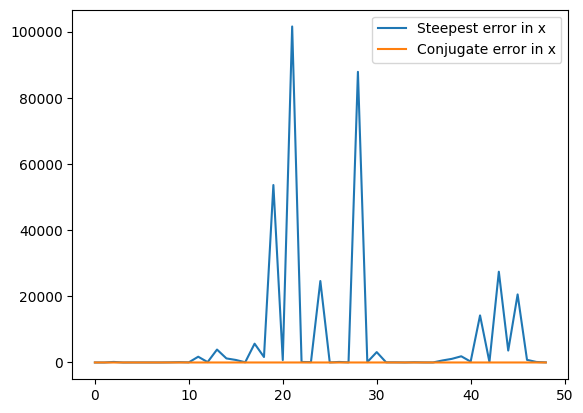

In [23]:
plt.plot(stee_error_size, label="Steepest error in x")
plt.plot(conj_error_size, label="Conjugate error in x")

plt.legend()